<a href="https://www.kaggle.com/code/sonalanand/spotify-project-day-03?scriptVersionId=232314556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🎧 Day 3 – Exploring Music Trends with New Visuals

Today’s focus is on visualising the Spotify dataset using **less common but powerful plots** to expand our data storytelling skills. The aim is to explore distribution, variation, density, and frequency from fresh angles using different chart types not yet explored in Days 1 & 2.

Each question is designed to reinforce your understanding of:
- Grouping & categorisation
- Data distribution patterns
- Mood-based comparisons
- Feature interactions (like streams vs energy)
- And using log/kde/jitter to enhance insight clarity

---

### 📌 Questions Covered in Day 3:

#### ✅ **Q1: Violin Plot**
**Goal:** Understand how streams are distributed across different song moods.  
*Tool used:* `sns.violinplot()`

#### ✅ **Q2: Strip Plot with Hue**
**Goal:** Explore how streams relate to energy levels across different moods.  
*Tool used:* `sns.stripplot()` + hue + jitter

#### ✅ **Q3: Count Plot**
**Goal:** Show the number of songs released on each day of the week.  
*Tool used:* `sns.countplot()`

#### ✅ **Q4: Boxplot**
**Goal:** Compare stream distribution across popularity categories.  
*Tool used:* `sns.boxplot()` with log scale

#### ✅ **Q5: KDE Plot**
**Goal:** Analyse how energy levels vary by song mood using smooth curves.  
*Tool used:* `sns.kdeplot()` with fill

---

Let’s jump into these visualisations and discover new layers of insight from the music trends of 2023 🎶👇

In [1]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify-dataset-for-self-practise/spotify_2023.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correct file path based on the output
file_path = "/kaggle/input/spotify-dataset-for-self-practise/spotify_2023.csv"

# Load the CSV file
try:
    df = pd.read_csv(file_path, encoding="ISO-8859-1")
    print("Dataset loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the file path.")

Dataset loaded successfully.
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                

In [3]:
# Set pandas display options for better readability
pd.set_option('display.float_format', '{:,.0f}'.format)



# Convert numeric columns (if they were read as strings)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['danceability_%'] = pd.to_numeric(df['danceability_%'], errors='coerce')
df['energy_%'] = pd.to_numeric(df['energy_%'], errors='coerce')
df['valence_%'] = pd.to_numeric(df['valence_%'], errors='coerce')



✅ Q1: Violin Plot – Distribution of Streams by Song Mood

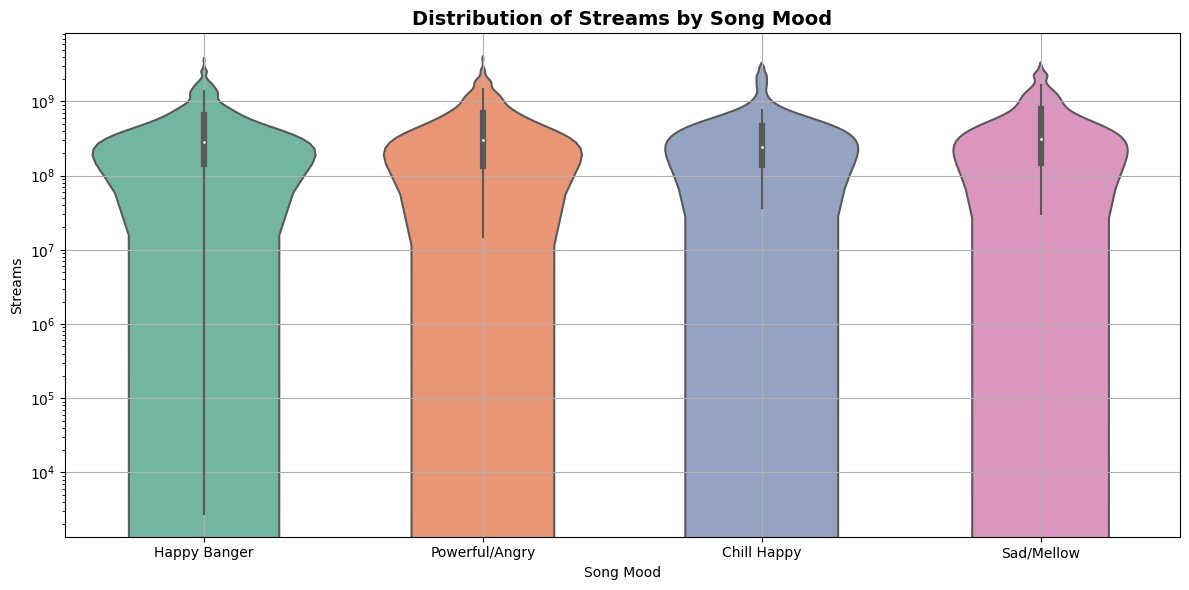

In [4]:
# violin plot to check distribution of streams across different song moods

df['song_mood'] = df.apply(lambda x:
    'Happy Banger' if (x['valence_%'] > 50 and x['energy_%'] > 50)
    else 'Chill Happy' if (x['valence_%'] > 50)
    else 'Powerful/Angry' if (x['energy_%'] > 50)
    else 'Sad/Mellow', axis=1)

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='song_mood', y='streams', palette='Set2')


plt.title('Distribution of Streams by Song Mood', fontsize=14, fontweight='bold')
plt.xlabel('Song Mood')
plt.ylabel('Streams')
plt.yscale('log')


plt.grid(True)


plt.tight_layout()
plt.show()



✅ Q2: Strip Plot with Hue

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


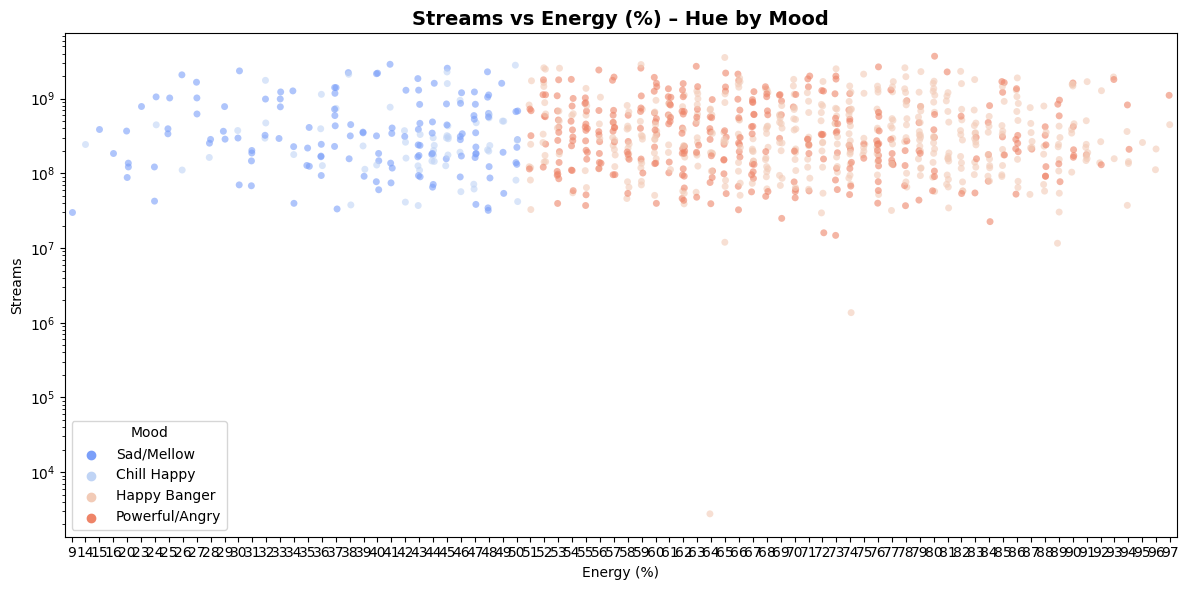

In [5]:

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='energy_%', y='streams', hue='song_mood', palette='coolwarm', jitter=True, alpha=0.6)


plt.title('Streams vs Energy (%) – Hue by Mood', fontsize=14, fontweight='bold')
plt.xlabel('Energy (%)')
plt.ylabel('Streams')


plt.legend(title='Mood')
plt.yscale('log')


plt.tight_layout()
plt.show()


✅ Q3: Count Plot

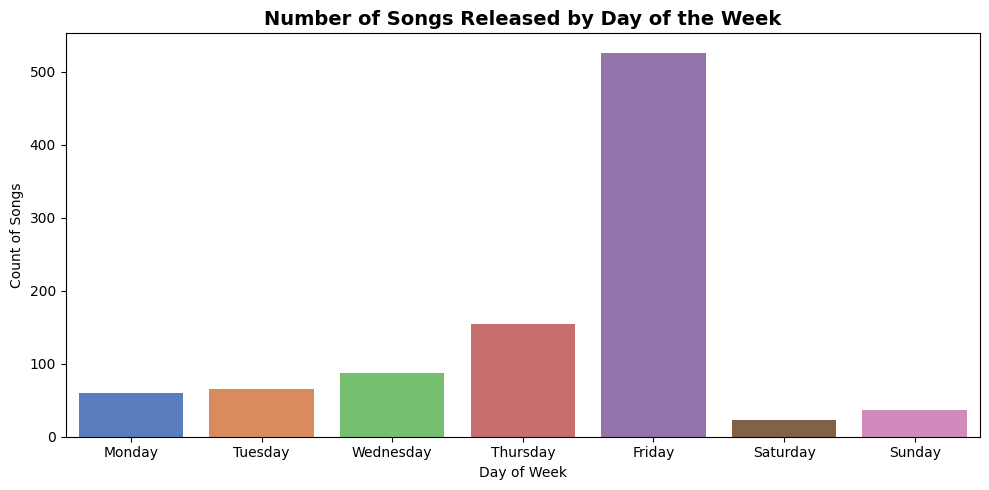

In [6]:

df['release_date'] = pd.to_datetime(df.rename(columns={
    'released_year' : 'year',
    'released_month' : 'month',
    'released_day' : 'day'})[['year','month','day']])

df['release_day_name'] = df['release_date'].dt.day_name()



plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='release_day_name',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              palette='muted')


plt.title('Number of Songs Released by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Count of Songs')


plt.tight_layout()
plt.show()

✅ Q4: Boxplot

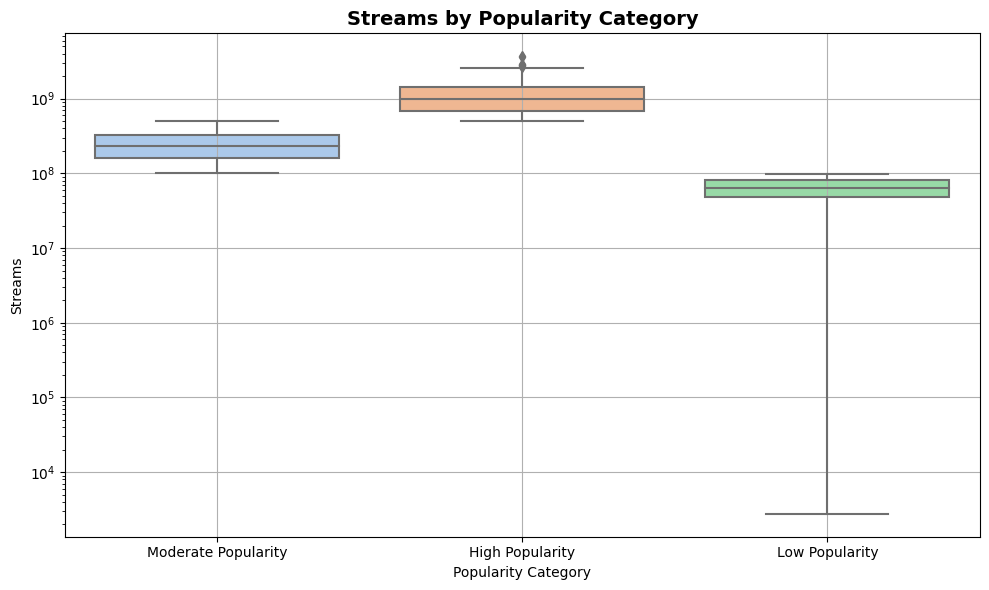

In [7]:
df['popularity_category'] = df['streams'].apply(lambda x:
    'High Popularity' if x > 500_000_000 else
    'Moderate Popularity' if x >= 100_000_000 else
    'Low Popularity')



plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='popularity_category', y='streams', palette='pastel')



plt.title('Streams by Popularity Category', fontsize=14, fontweight='bold')
plt.xlabel('Popularity Category')
plt.ylabel('Streams')


plt.yscale('log')
plt.grid(True)


plt.tight_layout()
plt.show()

✅ Q5: KDE Plot

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

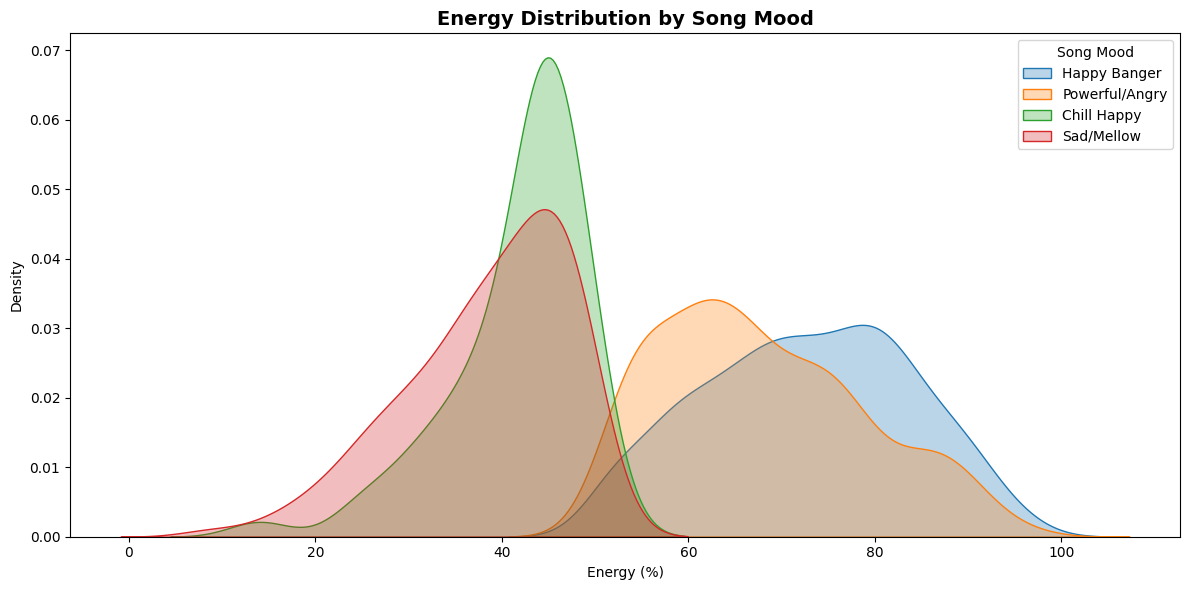

In [8]:

plt.figure(figsize=(12, 6))
for mood in df['song_mood'].unique():
    sns.kdeplot(data=df[df['song_mood'] == mood], x='energy_%', label=mood, fill=True, alpha=0.3)

plt.title('Energy Distribution by Song Mood', fontsize=14, fontweight='bold')
plt.xlabel('Energy (%)')
plt.ylabel('Density')


plt.legend(title='Song Mood')


plt.tight_layout()
plt.show()
